In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data=pd.read_csv("D:\\tala\\data science projects\\dr.fozouni\\14_1, real_estate_priceSYV.csv")
data.head()

,price,size,year,view
0,234314.144,643.09,2015,No sea view
1,228581.528,656.22,2009,No sea view
2,281626.336,487.29,2018,Sea view
3,401255.608,1504.75,2015,No sea view
4,458674.256,1275.46,2009,Sea view


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   100 non-null    float64
 1   size    100 non-null    float64
 2   year    100 non-null    int64  
 3   view    100 non-null    object 
dtypes: float64(2), int64(1), object(1)
memory usage: 3.2+ KB


In [4]:
data.describe(include="all")

,price,size,year,view
count,100.000000,100.000000,100.000000,100
unique,NaN,NaN,NaN,2
top,NaN,NaN,NaN,No sea view
freq,NaN,NaN,NaN,51
mean,292289.470160,853.024200,2012.600000,NaN
std,77051.727525,297.941951,4.729021,NaN
min,154282.128000,479.750000,2006.000000,NaN
25%,234280.148000,643.330000,2009.000000,NaN
50%,280590.716000,696.405000,2015.000000,NaN
75%,335723.696000,1029.322500,2018.000000,NaN


<AxesSubplot:xlabel='price', ylabel='Density'>

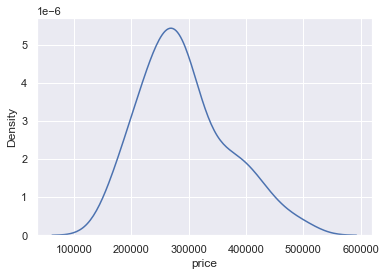

In [5]:
sns.kdeplot(data["price"])

<AxesSubplot:xlabel='size', ylabel='Density'>

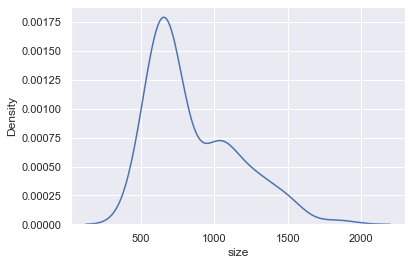

In [6]:
sns.kdeplot(data["size"])

<AxesSubplot:xlabel='year', ylabel='Density'>

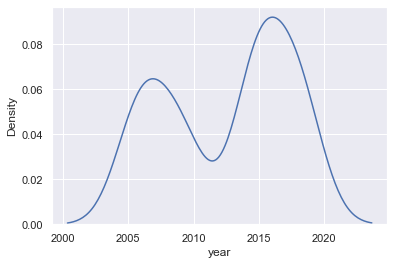

In [7]:
sns.kdeplot(data["year"])

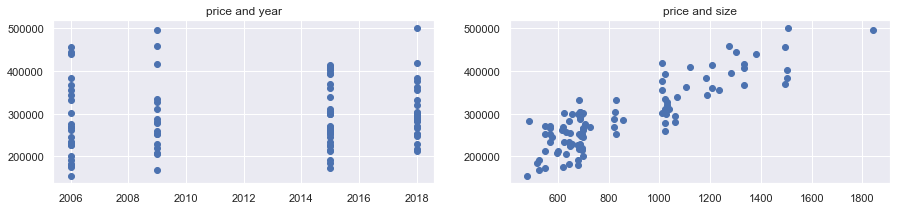

In [8]:
fig , (ax1 , ax2 )=plt.subplots(1,2,sharey=False ,figsize=(15,3))# 1row and 2 columns

ax1.scatter(data["year"],data["price"])
ax1.set_title("price and year")

ax2.scatter(data["size"],data["price"])
ax2.set_title("price and size")

plt.show()

In [9]:
data["view"]=data["view"].map({"Sea view": 0 ,"No sea view" :1 })
data.head()

,price,size,year,view
0,234314.144,643.09,2015,1
1,228581.528,656.22,2009,1
2,281626.336,487.29,2018,0
3,401255.608,1504.75,2015,1
4,458674.256,1275.46,2009,0


# comparing columns with each other

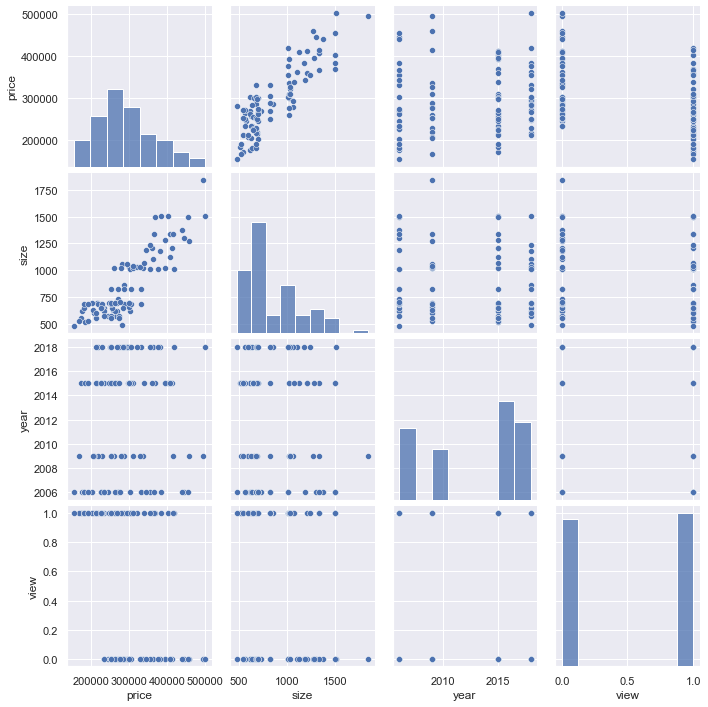

In [10]:
sns.pairplot(data)

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [12]:
variables=data[["year" , "size"]]
vif=pd.DataFrame()
vif["VIF"]=[variance_inflation_factor(variables.values , i) for i in range(variables.shape[1])]
vif["features"]=variables.columns
vif

,VIF,features
0,9.267285,year
1,9.267285,size


In [13]:
data.head()

,price,size,year,view
0,234314.144,643.09,2015,1
1,228581.528,656.22,2009,1
2,281626.336,487.29,2018,0
3,401255.608,1504.75,2015,1
4,458674.256,1275.46,2009,0


In [14]:
inputs=data.drop(["price"] , axis=1)
target=data["price"]

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train , x_test , y_train , y_test=train_test_split(inputs , target , test_size=0.2 ,random_state=42)

In [17]:
x_train.shape  , x_test.shape

((80, 3), (20, 3))

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
reg=LinearRegression()
reg.fit(x_train , y_train)

LinearRegression()

In [20]:
reg.score(x_train , y_train)

0.9105212084571079

In [21]:
reg.coef_

array([   222.29843384,   3031.22488541, -55603.51566791])

In [22]:
reg.intercept_

-5969659.744907533

In [23]:
y_pred=reg.predict(x_test)

# resedual

<AxesSubplot:xlabel='price', ylabel='Density'>

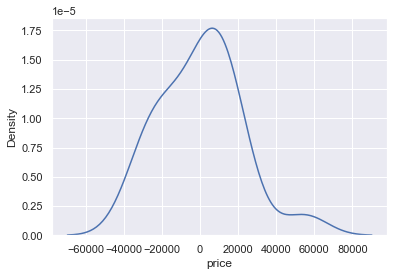

In [24]:
sns.kdeplot(y_test - y_pred)